[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1TZFrF7x0k4b69lql6FKapsF30fFxYSJ2?usp=sharing)

# **Models without SMOTE**

In [ ]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,mean_absolute_error, accuracy_score, mean_squared_error, precision_score, f1_score,recall_score
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
import seaborn as sns
import itertools
from sklearn.svm import SVC
from sklearn.metrics import recall_score
import re

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/marialopez33/IA-Proyecto/main/new_data.csv')
df.head()

,Unnamed: 0,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,Operating Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Working Capital/Equity_Low,Working Capital/Equity_Medium,Cash Flow to Sales_High,Cash Flow to Sales_Low,Cash Flow to Liability_High,Cash Flow to Liability_Low,Cash Flow to Liability_Medium,CFO to Assets_High,CFO to Assets_Low,CFO to Assets_Medium
0,0,1,0.370594,0.424389,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0,0,1,0,0,0,1,0,0,1
1,1,1,0.464291,0.538214,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0,0,1,0,0,0,1,1,0,0
2,2,1,0.426071,0.499019,0.601450,0.998857,0.796403,0.808388,0.302035,0.780284,...,0,0,1,0,0,0,1,0,0,1
3,3,1,0.399844,0.451265,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0,0,1,0,0,1,0,1,0,0
4,4,1,0.465022,0.538432,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0,0,1,0,0,0,1,1,0,0


In [ ]:
df.columns = df.columns.str.lstrip()

In [ ]:
df = df.drop(df.columns[0], axis=1)

In [ ]:
df.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', name).lower() for name in df.columns]
df.head()

,bankrupt?,r_o_a(_c) before interest and depreciation before interest,r_o_a(_a) before interest and % after tax,operating _gross _margin,operating _profit _rate,pre-tax net _interest _rate,after-tax net _interest _rate,non-industry income and expenditure/revenue,continuous interest rate (after tax),operating _expense _rate,...,working _capital/_equity__low,working _capital/_equity__medium,cash _flow to _sales__high,cash _flow to _sales__low,cash _flow to _liability__high,cash _flow to _liability__low,cash _flow to _liability__medium,c_f_o to _assets__high,c_f_o to _assets__low,c_f_o to _assets__medium
0,1,0.370594,0.424389,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,...,0,0,1,0,0,0,1,0,0,1
1,1,0.464291,0.538214,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,...,0,0,1,0,0,0,1,1,0,0
2,1,0.426071,0.499019,0.601450,0.998857,0.796403,0.808388,0.302035,0.780284,2.361297e-04,...,0,0,1,0,0,0,1,0,0,1
3,1,0.399844,0.451265,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,1.078888e-04,...,0,0,1,0,0,1,0,1,0,0
4,1,0.465022,0.538432,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,7.890000e+09,...,0,0,1,0,0,0,1,1,0,0


In [ ]:
df.shape

(6819, 115)

In [ ]:
df.columns

Index(['bankrupt?',
       'r_o_a(_c) before interest and depreciation before interest',
       'r_o_a(_a) before interest and % after tax', 'operating _gross _margin',
       'operating _profit _rate', 'pre-tax net _interest _rate',
       'after-tax net _interest _rate',
       'non-industry income and expenditure/revenue',
       'continuous interest rate (after tax)', 'operating _expense _rate',
       ...
       'working _capital/_equity__low', 'working _capital/_equity__medium',
       'cash _flow to _sales__high', 'cash _flow to _sales__low',
       'cash _flow to _liability__high', 'cash _flow to _liability__low',
       'cash _flow to _liability__medium', 'c_f_o to _assets__high',
       'c_f_o to _assets__low', 'c_f_o to _assets__medium'],
      dtype='object', length=115)

0    6599
1     220
Name: bankrupt?, dtype: int64


<Axes: xlabel='bankrupt?', ylabel='count'>

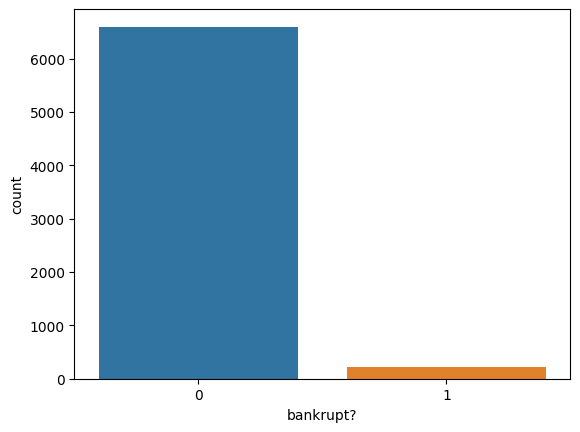

In [ ]:
print(df['bankrupt?'].value_counts())
sns.countplot(x=df['bankrupt?'])

In [ ]:
X = df.drop('bankrupt?', axis=1).values
Y = df['bankrupt?'].values
print (X.shape , Y.shape)
#1

(6819, 114) (6819,)


In [ ]:
Y

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
X

array([[0.37059426, 0.42438945, 0.60145721, ..., 0.        , 0.        ,
        1.        ],
       [0.46429094, 0.53821413, 0.61023509, ..., 1.        , 0.        ,
        0.        ],
       [0.42607127, 0.49901875, 0.60145001, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.47272461, 0.533744  , 0.61044408, ..., 1.        , 0.        ,
        0.        ],
       [0.50626432, 0.5599106 , 0.60784964, ..., 1.        , 0.        ,
        0.        ],
       [0.49305319, 0.57010467, 0.62740887, ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,stratify=Y,test_size=0.30)
print(X_train.shape)
print(X_test.shape)

(4773, 114)
(2046, 114)


In [ ]:
  #NORMALIZAR
def calcularMatrizCF(matrix,titulo):
    a = (matrix[0,0] +  matrix[0,1])
    b = (matrix[1,0] +  matrix[1,1])
    matrix[0,0] =  matrix[0,0] / a
    matrix[0,1] =  matrix[0,1] / a
    matrix[1,0] =  matrix[1,0] / b
    matrix[1,1] =  matrix[1,1] / b
    #MATRIZ DE CONFUSION
    sns.heatmap(matrix,annot=True)
    plt.xlabel('Label Pred')
    plt.ylabel('Label True')
    plt.title(titulo)
    print(matrix)

In [ ]:
def gradient_boosting_tree(X,y,num_trees):

    skf = StratifiedKFold(n_splits=4)

    resultados = pd.DataFrame()
    conf_matrix_list_of_arrays = np.zeros(2)

    idx = 0

    for trees in num_trees:
        EficienciaTrain = []
        EficienciaVal = []
        accuracy = []
        Macc = []
        Mpre = []
        Mrec = []
        Mf1 = []
        print(f"Training with {trees} trees...")
        for train_index, test_index in skf.split(X, y):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

            model = GradientBoostingClassifier(n_estimators=trees)
            model.fit(X_train,y_train)

            y_pred = model.predict(X_test)
            y_pred_train = model.predict(X_train)

            conf_matrix = confusion_matrix(y_test,y_pred)
            conf_matrix_list_of_arrays = conf_matrix_list_of_arrays + conf_matrix

            EficienciaTrain.append(np.mean(y_pred_train.ravel() == y_train.ravel()))
            EficienciaVal.append(np.mean(y_pred.ravel() == y_test.ravel()))
            accuracy.append(model.score(X_test, y_test))
            Macc.append(accuracy_score(y_test, y_pred))
            Mpre.append(precision_score(y_test, y_pred))
            Mrec.append(recall_score(y_test, y_pred))
            Mf1.append(f1_score(y_test, y_pred,average="weighted"))

        resultados.loc[idx,'número de arboles'] = trees
        resultados.loc[idx,'eficiencia de entrenamiento'] = np.mean(EficienciaTrain)
        resultados.loc[idx,'desviacion estandar entrenamiento'] = np.std(EficienciaTrain)
        resultados.loc[idx,'eficiencia de prueba'] = np.mean(EficienciaVal)
        resultados.loc[idx,'Intervalo de confianza (prueba)'] = np.std(EficienciaVal)
        resultados.loc[idx,'accuracy real'] = np.mean(Macc)
        resultados.loc[idx,'precision_score'] = np.mean(Mpre)
        resultados.loc[idx,'recall_score'] = np.mean(Mrec)
        resultados.loc[idx,'f1_score'] = np.mean(Mf1)
        idx= idx +1

    return (resultados, conf_matrix_list_of_arrays)

In [ ]:
resultados_gbt, matrix_gbt = gradient_boosting_tree(X_train,y_train,[20,50,100,200,300])

Training with 20 trees...
Training with 50 trees...
Training with 100 trees...
Training with 200 trees...
Training with 300 trees...


In [ ]:
resultados_gbt

,número de arboles,eficiencia de entrenamiento,desviacion estandar entrenamiento,eficiencia de prueba,Intervalo de confianza (prueba),accuracy real,precision_score,recall_score,f1_score
0,20.0,0.982680,0.000766,0.968363,0.002807,0.968363,0.553846,0.214406,0.961867
1,50.0,0.990153,0.000537,0.968782,0.003161,0.968782,0.562958,0.266532,0.963666
2,100.0,0.996368,0.000442,0.967735,0.002753,0.967735,0.519471,0.266700,0.962824
3,200.0,0.999860,0.000140,0.967526,0.001496,0.967526,0.497079,0.286100,0.963222
4,300.0,1.000000,0.000000,0.968154,0.001969,0.968154,0.514995,0.298920,0.963991


[[0.99151331 0.00848669]
 [0.73376623 0.26623377]]


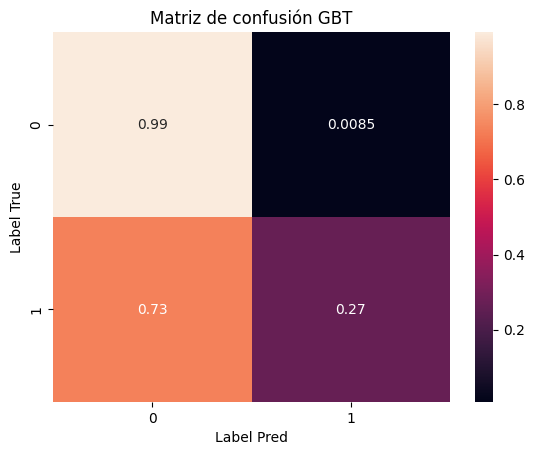

In [ ]:
calcularMatrizCF(matrix_gbt, "Matriz de confusión GBT")

# **SVM (Support Vector Machine)**

In [ ]:
#ejercicio de código
def support_vector_machine(x, y, kernels, gammas,params_reg):

    idx = 0

    kf = StratifiedKFold(n_splits=4)

    # crear una lista con la combinaciones de los elementos de cada list
    kernels_gammas_regs = list(itertools.product(kernels, gammas, params_reg))

    resultados = pd.DataFrame()
    conf_matrix_list_of_arrays = np.zeros(2)

    for params in kernels_gammas_regs:
        kernel, gamma, param_reg = params
        ''' print("parametros usados", params) # puede usar para ver los params '''
        errores_train = []
        errores_test = []
        EficienciaVal = []
        pct_support_vectors = []
        Macc = []
        Mpre = []
        Mrec = []
        Mf1 = []
        print(f"Running with Kernel: {kernel}, Gamma: {gamma}, C: {param_reg} parameters...")
        for train_index, test_index in kf.split(x,y):
            X_train, X_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]

            svm = SVC(kernel=kernel, gamma=gamma, C= param_reg)
            # Entrenar el modelo
            svm.fit(X=X_train, y=y_train)
            # calculo de errores

            y_train_pred = svm.predict(X=X_train)
            y_test_pred = svm.predict(X=X_test)

            conf_matrix = confusion_matrix(y_test, svm.predict(X_test))
            conf_matrix_list_of_arrays = conf_matrix_list_of_arrays + conf_matrix

            # error y pct de vectores de soporte
            errores_train.append(accuracy_score(y_true = y_train, y_pred = y_train_pred))
            errores_test.append(accuracy_score(y_true = y_test, y_pred = y_test_pred))

            # contar muestras de entrenamiento
            n_train = X_train.shape[0]
            pct_vs = ( svm.support_vectors_.shape[0] /n_train)
            pct_support_vectors.append(pct_vs)

            Macc.append(accuracy_score(y_test, y_test_pred))
            Mpre.append(precision_score(y_test, y_test_pred))
            Mrec.append(recall_score(y_test, y_test_pred))
            Mf1.append(f1_score(y_test, y_test_pred,average="weighted",labels=np.unique(y_test_pred)))
            EficienciaVal.append(np.mean(y_test_pred.ravel() == y_test.ravel()))


        resultados.loc[idx,'kernel'] = kernel
        resultados.loc[idx,'gamma'] = gamma
        resultados.loc[idx,'param_reg'] = param_reg
        resultados.loc[idx,'error de entrenamiento'] = np.mean(errores_train)
        resultados.loc[idx,'error de prueba'] = np.mean(errores_test)
        resultados.loc[idx,'% de vectores de soporte'] = np.mean(pct_support_vectors)*100
        resultados.loc[idx,'accuracy real'] = np.mean(Macc)
        resultados.loc[idx,'Intervalo de confianza (prueba)'] = np.std(EficienciaVal)
        resultados.loc[idx,'precision_score'] = np.mean(Mpre)
        resultados.loc[idx,'recall_score'] = np.mean(Mrec)
        resultados.loc[idx,'f1_score'] = np.mean(Mf1)

        idx+=1
    return (resultados, conf_matrix_list_of_arrays)

In [ ]:
# vamos a realizar los experimentos
resultados_svm, matrix_svm  = support_vector_machine(x = X,y=Y,
                                 kernels=['rbf'],
                                 gammas = [0.01],
                                 params_reg = [0.01]
                                )
resultados_svm

Running with Kernel: rbf, Gamma: 0.01, C: 0.01 parameters...


,kernel,gamma,param_reg,error de entrenamiento,error de prueba,% de vectores de soporte,accuracy real,Intervalo de confianza (prueba),precision_score,recall_score,f1_score
0,rbf,0.01,0.01,0.967737,0.967737,54.846752,0.967737,0.000008,0.0,0.0,0.983604


In [ ]:
matrix_svm

array([[6599.,    0.],
       [ 220.,    0.]])

[[1. 0.]
 [1. 0.]]


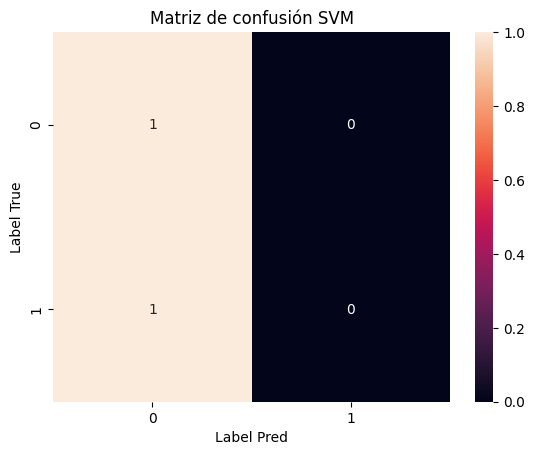

In [ ]:
calcularMatrizCF(matrix_svm, "Matriz de confusión SVM")

# **RF (Random Forest)**

In [ ]:
#ejercicio de código
def random_forest(num_trees,numero_de_variables, X, Y):
    folds = 4
    skf = StratifiedKFold(n_splits=folds)
    resultados = pd.DataFrame()
    idx = 0
    conf_matrix_list_of_arrays = np.zeros(2)

    for trees in num_trees:

        for num_variables in numero_de_variables:
            ## para almacenar los errores intermedios
            EficienciaTrain = []
            EficienciaVal = []
            Macc = []
            Mpre = []
            Mrec = []
            Mf1 = []
            for train, test in skf.split(X, Y):
                Xtrain = X[train,:]
                Ytrain = Y[train]
                Xtest = X[test,:]
                Ytest = Y[test]
                #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
                modelo = RandomForestClassifier(n_estimators=trees, max_features=num_variables, criterion="gini")
                modelo.fit(Xtrain,Ytrain)
                #predecir muestras de entrenamiento
                Ytrain_pred = modelo.predict(Xtrain)
                #predecir muestras de pruebas
                Yest = modelo.predict(Xtest)
                #Evaluamos las predicciones del modelo con los datos de test
                EficienciaTrain.append(np.mean(Ytrain_pred.ravel() == Ytrain.ravel()))
                EficienciaVal.append(np.mean(Yest.ravel() == Ytest.ravel()))
                conf_matrix = confusion_matrix(Ytest, modelo.predict(Xtest))
                conf_matrix_list_of_arrays = conf_matrix_list_of_arrays + conf_matrix
                Macc.append(accuracy_score(Ytest, Yest))
                Mpre.append(precision_score(Ytest, Yest))
                Mrec.append(recall_score(Ytest, Yest))
                Mf1.append(f1_score(Ytest, Yest))



            resultados.loc[idx,'número de arboles'] = trees
            resultados.loc[idx,'variables para la selección del mejor umbral'] = num_variables
            resultados.loc[idx,'eficiencia de entrenamiento'] = np.mean(EficienciaTrain)
            resultados.loc[idx,'desviacion estandar entrenamiento'] = np.std(EficienciaTrain)
            resultados.loc[idx,'eficiencia de prueba'] = np.mean(EficienciaVal)
            resultados.loc[idx,'Intervalo de confianza (prueba)'] = np.std(EficienciaVal)
            resultados.loc[idx,'accuracy real'] = np.mean(Macc)
            resultados.loc[idx,'precision_score'] = np.mean(Mpre)
            resultados.loc[idx,'recall_score'] = np.mean(Mrec)
            resultados.loc[idx,'f1_score'] = np.mean(Mf1)
            idx= idx +1
        print(f"Termina para {trees} arboles")

    return (resultados, conf_matrix_list_of_arrays)

In [ ]:
arboles = [5,10,20,50,100, 150]
variables_seleccion = [5,10,15,20,25]
resultados_rf, matrixRF= random_forest(arboles, variables_seleccion, X, Y)
resultados_rf

Termina para 5 arboles
Termina para 10 arboles
Termina para 20 arboles
Termina para 50 arboles
Termina para 100 arboles
Termina para 150 arboles


,número de arboles,variables para la selección del mejor umbral,eficiencia de entrenamiento,desviacion estandar entrenamiento,eficiencia de prueba,Intervalo de confianza (prueba),accuracy real,precision_score,recall_score,f1_score
0,5.0,5.0,0.995503,0.000415,0.956154,0.016204,0.956154,0.417364,0.222727,0.247413
1,5.0,10.0,0.995845,0.000911,0.950729,0.026403,0.950729,0.391844,0.209091,0.243429
2,5.0,15.0,0.995601,0.001002,0.955714,0.018968,0.955714,0.417716,0.245455,0.278802
3,5.0,20.0,0.995454,0.000213,0.950875,0.024691,0.950875,0.388062,0.209091,0.235576
4,5.0,25.0,0.995356,0.000506,0.951608,0.021983,0.951608,0.353898,0.200000,0.216382
5,10.0,5.0,0.996383,0.000943,0.963485,0.006345,0.963485,0.464627,0.127273,0.178176
6,10.0,10.0,0.996187,0.001240,0.955420,0.017504,0.955420,0.342308,0.109091,0.133741
7,10.0,15.0,0.996676,0.000691,0.961872,0.011048,0.961872,0.490693,0.145455,0.201012
8,10.0,20.0,0.996236,0.001433,0.955274,0.023374,0.955274,0.458283,0.163636,0.222422
9,10.0,25.0,0.996969,0.000626,0.954687,0.022627,0.954687,0.401442,0.154545,0.195067


[[0.98399758 0.01600242]
 [0.84363636 0.15636364]]


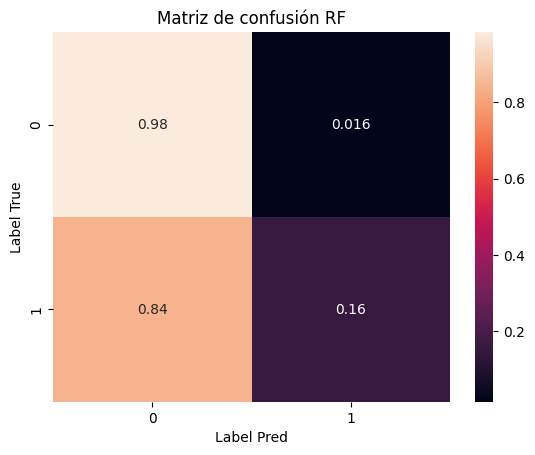

In [ ]:
calcularMatrizCF(matrixRF, "Matriz de confusión RF")

# **Instalaciones necesarias**

In [ ]:
!pip install xgboost
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.6 MB/s eta 0:00:00


# **Importación de librerías**

In [ ]:
import os
import re
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action="ignore")
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
import sklearn
import xgboost
from sklearn import tree
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from imblearn.pipeline import Pipeline
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import recall_score, f1_score, roc_auc_score
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

# **Lectura del dataset limpio**

In [ ]:
df.head()

,bankrupt?,r_o_a(_c) before interest and depreciation before interest,r_o_a(_a) before interest and % after tax,operating _gross _margin,operating _profit _rate,pre-tax net _interest _rate,after-tax net _interest _rate,non-industry income and expenditure/revenue,continuous interest rate (after tax),operating _expense _rate,...,working _capital/_equity__low,working _capital/_equity__medium,cash _flow to _sales__high,cash _flow to _sales__low,cash _flow to _liability__high,cash _flow to _liability__low,cash _flow to _liability__medium,c_f_o to _assets__high,c_f_o to _assets__low,c_f_o to _assets__medium
0,1,0.370594,0.424389,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,...,0,0,1,0,0,0,1,0,0,1
1,1,0.464291,0.538214,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,...,0,0,1,0,0,0,1,1,0,0
2,1,0.426071,0.499019,0.601450,0.998857,0.796403,0.808388,0.302035,0.780284,2.361297e-04,...,0,0,1,0,0,0,1,0,0,1
3,1,0.399844,0.451265,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,1.078888e-04,...,0,0,1,0,0,1,0,1,0,0
4,1,0.465022,0.538432,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,7.890000e+09,...,0,0,1,0,0,0,1,1,0,0


In [ ]:
df.columns = df.columns.str.lstrip()

In [ ]:
df.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', name).lower() for name in df.columns]
df.head()

,bankrupt?,r_o_a(_c) before interest and depreciation before interest,r_o_a(_a) before interest and % after tax,operating _gross _margin,operating _profit _rate,pre-tax net _interest _rate,after-tax net _interest _rate,non-industry income and expenditure/revenue,continuous interest rate (after tax),operating _expense _rate,...,working _capital/_equity__low,working _capital/_equity__medium,cash _flow to _sales__high,cash _flow to _sales__low,cash _flow to _liability__high,cash _flow to _liability__low,cash _flow to _liability__medium,c_f_o to _assets__high,c_f_o to _assets__low,c_f_o to _assets__medium
0,1,0.370594,0.424389,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,...,0,0,1,0,0,0,1,0,0,1
1,1,0.464291,0.538214,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,...,0,0,1,0,0,0,1,1,0,0
2,1,0.426071,0.499019,0.601450,0.998857,0.796403,0.808388,0.302035,0.780284,2.361297e-04,...,0,0,1,0,0,0,1,0,0,1
3,1,0.399844,0.451265,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,1.078888e-04,...,0,0,1,0,0,1,0,1,0,0
4,1,0.465022,0.538432,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,7.890000e+09,...,0,0,1,0,0,0,1,1,0,0


# **Características del dataset tras la limpieza**

In [ ]:
df.shape

(6819, 115)

In [ ]:
df.columns

Index(['bankrupt?',
       'r_o_a(_c) before interest and depreciation before interest',
       'r_o_a(_a) before interest and % after tax', 'operating _gross _margin',
       'operating _profit _rate', 'pre-tax net _interest _rate',
       'after-tax net _interest _rate',
       'non-industry income and expenditure/revenue',
       'continuous interest rate (after tax)', 'operating _expense _rate',
       ...
       'working _capital/_equity__low', 'working _capital/_equity__medium',
       'cash _flow to _sales__high', 'cash _flow to _sales__low',
       'cash _flow to _liability__high', 'cash _flow to _liability__low',
       'cash _flow to _liability__medium', 'c_f_o to _assets__high',
       'c_f_o to _assets__low', 'c_f_o to _assets__medium'],
      dtype='object', length=115)

0    6599
1     220
Name: bankrupt?, dtype: int64


<Axes: xlabel='bankrupt?', ylabel='count'>

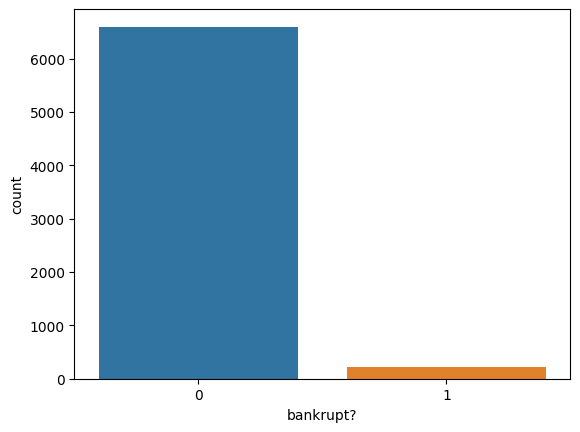

In [ ]:
print(df['bankrupt?'].value_counts())
sns.countplot(x=df['bankrupt?'])

In [ ]:
etiquetas = df['bankrupt?']
df = df.drop(['bankrupt?'], axis = 1)

In [ ]:
etiquetas

0       1
1       1
2       1
3       1
4       1
       ..
6814    0
6815    0
6816    0
6817    0
6818    0
Name: bankrupt?, Length: 6819, dtype: int64

In [ ]:
df

,r_o_a(_c) before interest and depreciation before interest,r_o_a(_a) before interest and % after tax,operating _gross _margin,operating _profit _rate,pre-tax net _interest _rate,after-tax net _interest _rate,non-industry income and expenditure/revenue,continuous interest rate (after tax),operating _expense _rate,research and development expense rate,...,working _capital/_equity__low,working _capital/_equity__medium,cash _flow to _sales__high,cash _flow to _sales__low,cash _flow to _liability__high,cash _flow to _liability__low,cash _flow to _liability__medium,c_f_o to _assets__high,c_f_o to _assets__low,c_f_o to _assets__medium
0,0.370594,0.424389,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.000000e+00,...,0,0,1,0,0,0,1,0,0,1
1,0.464291,0.538214,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.000000e+00,...,0,0,1,0,0,0,1,1,0,0
2,0.426071,0.499019,0.601450,0.998857,0.796403,0.808388,0.302035,0.780284,2.361297e-04,2.550000e+07,...,0,0,1,0,0,0,1,0,0,1
3,0.399844,0.451265,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,1.078888e-04,0.000000e+00,...,0,0,1,0,0,1,0,1,0,0
4,0.465022,0.538432,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,7.890000e+09,0.000000e+00,...,0,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0.493687,0.539468,0.604455,0.998992,0.797409,0.809331,0.303510,0.781588,1.510213e-04,4.500000e+09,...,0,0,1,0,0,0,1,1,0,0
6815,0.475162,0.538269,0.598308,0.998992,0.797414,0.809327,0.303520,0.781586,5.220000e+09,1.440000e+09,...,0,0,1,0,0,0,1,1,0,0
6816,0.472725,0.533744,0.610444,0.998984,0.797401,0.809317,0.303512,0.781546,2.509312e-04,1.039086e-04,...,0,0,1,0,0,0,1,1,0,0
6817,0.506264,0.559911,0.607850,0.999074,0.797500,0.809399,0.303498,0.781663,1.236154e-04,2.510000e+09,...,0,0,1,0,0,0,1,1,0,0


# **División de datos de entrenamiento y test**

In [ ]:
X_train, X_test, y_train, y_test  = train_test_split(df, etiquetas, test_size=0.1, stratify = etiquetas, random_state = 4)

# **Validación cruzada estratificada de K-Fold**

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=False)

for index_train, index_test in skf.split(X_train, y_train):
    X_train_sm, X_val_sm = X_train.iloc[index_train], X_train.iloc[index_test]
    y_train_sm, y_val_sm = y_train.iloc[index_train], y_train.iloc[index_test]

X_train_sm = X_train_sm.values
X_val_sm = X_val_sm.values
y_train_sm = y_train_sm.values
y_val_sm = y_val_sm.values

# **Regresión logística**

In [ ]:
accuracy_lst_reg = []
precision_lst_reg = []
recall_lst_reg = []
f1_lst_reg = []
auc_lst_reg = []

log_reg_sm = LogisticRegression()
log_reg_params = {"penalty": ['l2'],
                  'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                  'class_weight': ['balanced',None],
                  'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)


for train, val in skf.split(X_train_sm, y_train_sm):
    pipeline_reg = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) # SMOTE happens during Cross Validation not before..
    model_reg = pipeline_reg.fit(X_train_sm[train], y_train_sm[train])
    best_est_reg = rand_log_reg.best_estimator_
    prediction_reg = best_est_reg.predict(X_train_sm[val])

    accuracy_lst_reg.append(pipeline_reg.score(X_train_sm[val], y_train_sm[val]))
    precision_lst_reg.append(precision_score(y_train_sm[val], prediction_reg))
    recall_lst_reg.append(recall_score(y_train_sm[val], prediction_reg))
    f1_lst_reg.append(f1_score(y_train_sm[val], prediction_reg))
    auc_lst_reg.append(roc_auc_score(y_train_sm[val], prediction_reg))


print('Logistic Regression (SMOTE) results:')
print('')
print("accuracy: {}".format(np.mean(accuracy_lst_reg)))
print("precision: {}".format(np.mean(precision_lst_reg)))
print("recall: {}".format(np.mean(recall_lst_reg)))
print("f1: {}".format(np.mean(f1_lst_reg)))

Logistic Regression (SMOTE) results:

accuracy: 0.7835030549898168
precision: 0.041138662705294884
recall: 0.3284274193548387
f1: 0.07309944402432358


In [ ]:
rand_log_reg.best_params_

{'solver': 'liblinear', 'penalty': 'l2', 'class_weight': 'balanced', 'C': 100}

In [ ]:
label = ['Fin.Stable', 'Fin.Unstable']
pred_reg_sm = best_est_reg.predict(X_val_sm)
print(classification_report(y_val_sm, pred_reg_sm, target_names=label))

              precision    recall  f1-score   support

  Fin.Stable       0.98      0.71      0.82      1187
Fin.Unstable       0.05      0.47      0.09        40

    accuracy                           0.70      1227
   macro avg       0.51      0.59      0.46      1227
weighted avg       0.95      0.70      0.80      1227



# **XGBoost**

In [ ]:
accuracy_lst_xgb = []
precision_lst_xgb = []
recall_lst_xgb = []
f1_lst_xgb = []
auc_lst_xgb = []

xgb_sm = xgboost.XGBClassifier(random_state = 42)
xgb_params = {'eta' : [0.1,0.01,0.001],
              'eval_metric': ['logloss'],
              'max_depth' : [3,6,9],
              'lambda' : [1,1.5,2],
              'alpha' : [0,0.5,1]}

rand_xgb = RandomizedSearchCV(xgb_sm, xgb_params, n_iter=4)


for train, val in skf.split(X_train_sm, y_train_sm):
    pipeline_xgb = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_xgb) # SMOTE happens during Cross Validation not before..
    model_xgb = pipeline_xgb.fit(X_train_sm, y_train_sm)
    best_est_xgb = rand_xgb.best_estimator_
    prediction_xgb = best_est_xgb.predict(X_train_sm[val])

    accuracy_lst_xgb.append(pipeline_xgb.score(X_train_sm[val], y_train_sm[val]))
    precision_lst_xgb.append(precision_score(y_train_sm[val], prediction_xgb))
    recall_lst_xgb.append(recall_score(y_train_sm[val], prediction_xgb))
    f1_lst_xgb.append(f1_score(y_train_sm[val], prediction_xgb))
    auc_lst_xgb.append(roc_auc_score(y_train_sm[val], prediction_xgb))

print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst_xgb)))
print("precision: {}".format(np.mean(precision_lst_xgb)))
print("recall: {}".format(np.mean(recall_lst_xgb)))
print("f1: {}".format(np.mean(f1_lst_xgb)))
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9912423625254583
precision: 0.8833333333333334
recall: 0.9935483870967742
f1: 0.916504854368932
---------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
rand_xgb.best_params_

{'max_depth': 6, 'lambda': 2, 'eval_metric': 'logloss', 'eta': 0.1, 'alpha': 0}

In [ ]:
smote_prediction_xgb = best_est_xgb.predict(X_val_sm)
print(classification_report(y_val_sm, smote_prediction_xgb, target_names=label))

              precision    recall  f1-score   support

  Fin.Stable       0.98      0.98      0.98      1187
Fin.Unstable       0.42      0.35      0.38        40

    accuracy                           0.96      1227
   macro avg       0.70      0.67      0.68      1227
weighted avg       0.96      0.96      0.96      1227



# **Random Forest**

In [ ]:
accuracy_lst_rfc = []
precision_lst_rfc = []
recall_lst_rfc = []
f1_lst_rfc = []
auc_lst_rfc = []

rfc_sm = RandomForestClassifier()
rfc_params = {'max_features' : ['auto', 'sqrt', 'log2'],
              'random_state' : [42],
              'class_weight' : ['balanced','balanced_subsample'],
              'criterion' : ['gini', 'entropy'],
              'bootstrap' : [True, False]}


rand_rfc = RandomizedSearchCV(rfc_sm, rfc_params, n_iter=4)


for train, val in skf.split(X_train_sm, y_train_sm):
    pipeline_rfc = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_rfc)
    model_rfc = pipeline_rfc.fit(X_train_sm, y_train_sm)
    best_est_rfc = rand_rfc.best_estimator_
    prediction_rfc = best_est_rfc.predict(X_train_sm[val])

    accuracy_lst_rfc.append(pipeline_rfc.score(X_train_sm[val], y_train_sm[val]))
    precision_lst_rfc.append(precision_score(y_train_sm[val], prediction_rfc))
    recall_lst_rfc.append(recall_score(y_train_sm[val], prediction_rfc))
    f1_lst_rfc.append(f1_score(y_train_sm[val], prediction_rfc))
    auc_lst_rfc.append(roc_auc_score(y_train_sm[val], prediction_rfc))

print("accuracy: {}".format(np.mean(accuracy_lst_rfc)))
print("precision: {}".format(np.mean(precision_lst_rfc)))
print("recall: {}".format(np.mean(recall_lst_rfc)))
print("f1: {}".format(np.mean(f1_lst_rfc)))

accuracy: 1.0
precision: 1.0
recall: 1.0
f1: 1.0


In [ ]:
rand_rfc.best_params_

{'random_state': 42,
 'max_features': 'log2',
 'criterion': 'entropy',
 'class_weight': 'balanced_subsample',
 'bootstrap': False}

In [ ]:
label = ['Fin.Stable', 'Fin.Unstable']
smote_prediction_rfc = best_est_rfc.predict(X_val_sm)
print(classification_report(y_val_sm, smote_prediction_rfc, target_names=label))

              precision    recall  f1-score   support

  Fin.Stable       0.98      0.98      0.98      1187
Fin.Unstable       0.50      0.50      0.50        40

    accuracy                           0.97      1227
   macro avg       0.74      0.74      0.74      1227
weighted avg       0.97      0.97      0.97      1227



# **Gradient Boosting**

In [ ]:
accuracy_lst_gbc = []
precision_lst_gbc = []
recall_lst_gbc = []
f1_lst_gbc = []
auc_lst_gbc = []

gbc_sm = GradientBoostingClassifier()
gbc_params = {'max_features' : ['auto', 'sqrt', 'log2'],
              'random_state' : [42],
              'n_estimators' : [20,50,100,200,300]}


rand_gbc = RandomizedSearchCV(gbc_sm, gbc_params, n_iter=4)


for train, val in skf.split(X_train_sm, y_train_sm):
    pipeline_gbc = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_gbc)
    model_gbc = pipeline_gbc.fit(X_train_sm, y_train_sm)
    best_est_gbc = rand_gbc.best_estimator_
    prediction_gbc = best_est_gbc.predict(X_train_sm[val])

    accuracy_lst_gbc.append(pipeline_gbc.score(X_train_sm[val], y_train_sm[val]))
    precision_lst_gbc.append(precision_score(y_train_sm[val], prediction_gbc))
    recall_lst_gbc.append(recall_score(y_train_sm[val], prediction_gbc))
    f1_lst_gbc.append(f1_score(y_train_sm[val], prediction_gbc))
    auc_lst_gbc.append(roc_auc_score(y_train_sm[val], prediction_gbc))

print("accuracy: {}".format(np.mean(accuracy_lst_gbc)))
print("precision: {}".format(np.mean(precision_lst_gbc)))
print("recall: {}".format(np.mean(recall_lst_gbc)))
print("f1: {}".format(np.mean(f1_lst_gbc)))

accuracy: 0.994501018329939
precision: 0.905424629016761
recall: 0.9300403225806452
f1: 0.915303986569765


In [ ]:
rand_gbc.best_params_

{'random_state': 42, 'n_estimators': 300, 'max_features': 'log2'}

In [ ]:
smote_prediction_gbc = best_est_gbc.predict(X_val_sm)
print(classification_report(y_val_sm, smote_prediction_gbc, target_names=label))

              precision    recall  f1-score   support

  Fin.Stable       0.98      0.98      0.98      1187
Fin.Unstable       0.38      0.33      0.35        40

    accuracy                           0.96      1227
   macro avg       0.68      0.65      0.67      1227
weighted avg       0.96      0.96      0.96      1227



# **Catboost**

In [ ]:
accuracy_lst_cbt = []
precision_lst_cbt = []
recall_lst_cbt = []
f1_lst_cbt = []
auc_lst_cbt = []

cbt_sm = CatBoostClassifier(verbose = 0)

cbt_params = {'eval_metric': ['F1'],
              'iterations': [100,500,1000],
              'learning_rate' : [0.1,0.01,0.001],
              'random_seed' : [42],
              'auto_class_weights' : ['Balanced','SqrtBalanced']
             }


rand_cbt = RandomizedSearchCV(cbt_sm, cbt_params, n_iter=4)

for train, val in skf.split(X_train_sm, y_train_sm):
    pipeline_cbt = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_cbt) # SMOTE happens during Cross Validation not before..
    model_cbt = pipeline_cbt.fit(X_train_sm, y_train_sm)
    best_est_cbt = rand_cbt.best_estimator_
    prediction_cbt = best_est_cbt.predict(X_train_sm[val])

    accuracy_lst_cbt.append(pipeline_cbt.score(X_train_sm[val], y_train_sm[val]))
    precision_lst_cbt.append(precision_score(y_train_sm[val], prediction_cbt))
    recall_lst_cbt.append(recall_score(y_train_sm[val], prediction_cbt))
    f1_lst_cbt.append(f1_score(y_train_sm[val], prediction_cbt))
    auc_lst_cbt.append(roc_auc_score(y_train_sm[val], prediction_cbt))


print("accuracy: {}".format(np.mean(accuracy_lst_cbt)))
print("precision: {}".format(np.mean(precision_lst_cbt)))
print("recall: {}".format(np.mean(recall_lst_cbt)))
print("f1: {}".format(np.mean(f1_lst_cbt)))

accuracy: 0.9983706720977598
precision: 0.9741935483870968
recall: 0.9741935483870968
f1: 0.9741935483870968


In [ ]:
smote_prediction_cbt = best_est_cbt.predict(X_val_sm)
print(classification_report(y_val_sm, smote_prediction_cbt, target_names=label))

              precision    recall  f1-score   support

  Fin.Stable       0.98      0.98      0.98      1187
Fin.Unstable       0.37      0.28      0.31        40

    accuracy                           0.96      1227
   macro avg       0.67      0.63      0.65      1227
weighted avg       0.96      0.96      0.96      1227



In [ ]:
rand_cbt.best_params_

{'random_seed': 42,
 'learning_rate': 0.1,
 'iterations': 500,
 'eval_metric': 'F1',
 'auto_class_weights': 'SqrtBalanced'}

# **Curvas ROC**

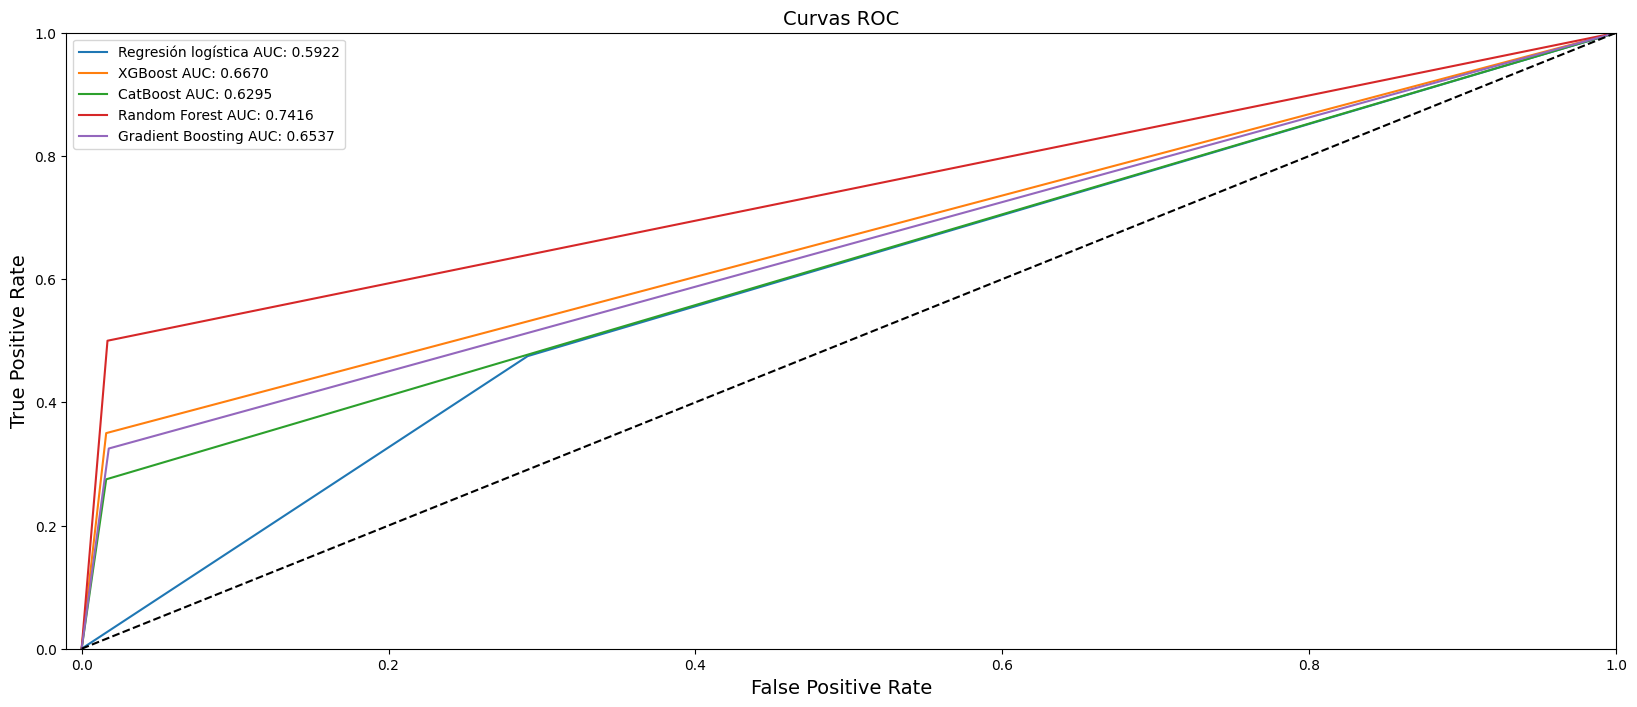

In [ ]:
from sklearn.metrics import roc_curve

log_false_positive_rate, log_true_positive_rate, _ = roc_curve(y_val_sm, pred_reg_sm)
xgb_false_positive_rate, xgb_true_positive_rate, _ = roc_curve(y_val_sm, smote_prediction_xgb)
rfc_false_positive_rate, rfc_true_positive_rate, _ = roc_curve(y_val_sm, smote_prediction_rfc)
gbc_false_positive_rate, gbc_true_positive_rate, _ = roc_curve(y_val_sm, smote_prediction_gbc)
cat_false_positive_rate, cat_true_positive_rate, _ = roc_curve(y_val_sm, smote_prediction_cbt)


def graficar_curvas_ROC(log_false_positive_rate, log_true_positive_rate, rfc_false_positive_rate, rfc_true_positive_rate, xgb_false_positive_rate, xgb_true_positive_rate, cat_false_positive_rate, cat_true_positive_rate, gbc_false_positive_rate, gbc_true_positive_rate):
    plt.figure(figsize=(20,8))
    plt.title('Curvas ROC', fontsize=14)
    plt.plot(log_false_positive_rate, log_true_positive_rate, label='Regresión logística AUC: {:.4f}'.format(roc_auc_score(y_val_sm, pred_reg_sm)))
    plt.plot(xgb_false_positive_rate, xgb_true_positive_rate, label='XGBoost AUC: {:.4f}'.format(roc_auc_score(y_val_sm, smote_prediction_xgb)))
    plt.plot(cat_false_positive_rate, cat_true_positive_rate, label='CatBoost AUC: {:.4f}'.format(roc_auc_score(y_val_sm, smote_prediction_cbt)))
    plt.plot(rfc_false_positive_rate, rfc_true_positive_rate, label='Random Forest AUC: {:.4f}'.format(roc_auc_score(y_val_sm, smote_prediction_rfc)))
    plt.plot(gbc_false_positive_rate, gbc_true_positive_rate, label='Gradient Boosting AUC: {:.4f}'.format(roc_auc_score(y_val_sm, smote_prediction_gbc)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.legend()

graficar_curvas_ROC(log_false_positive_rate, log_true_positive_rate, rfc_false_positive_rate, rfc_true_positive_rate, xgb_false_positive_rate, xgb_true_positive_rate, cat_false_positive_rate, cat_true_positive_rate, gbc_false_positive_rate, gbc_true_positive_rate)

plt.show()

# **Matrices de confusión**

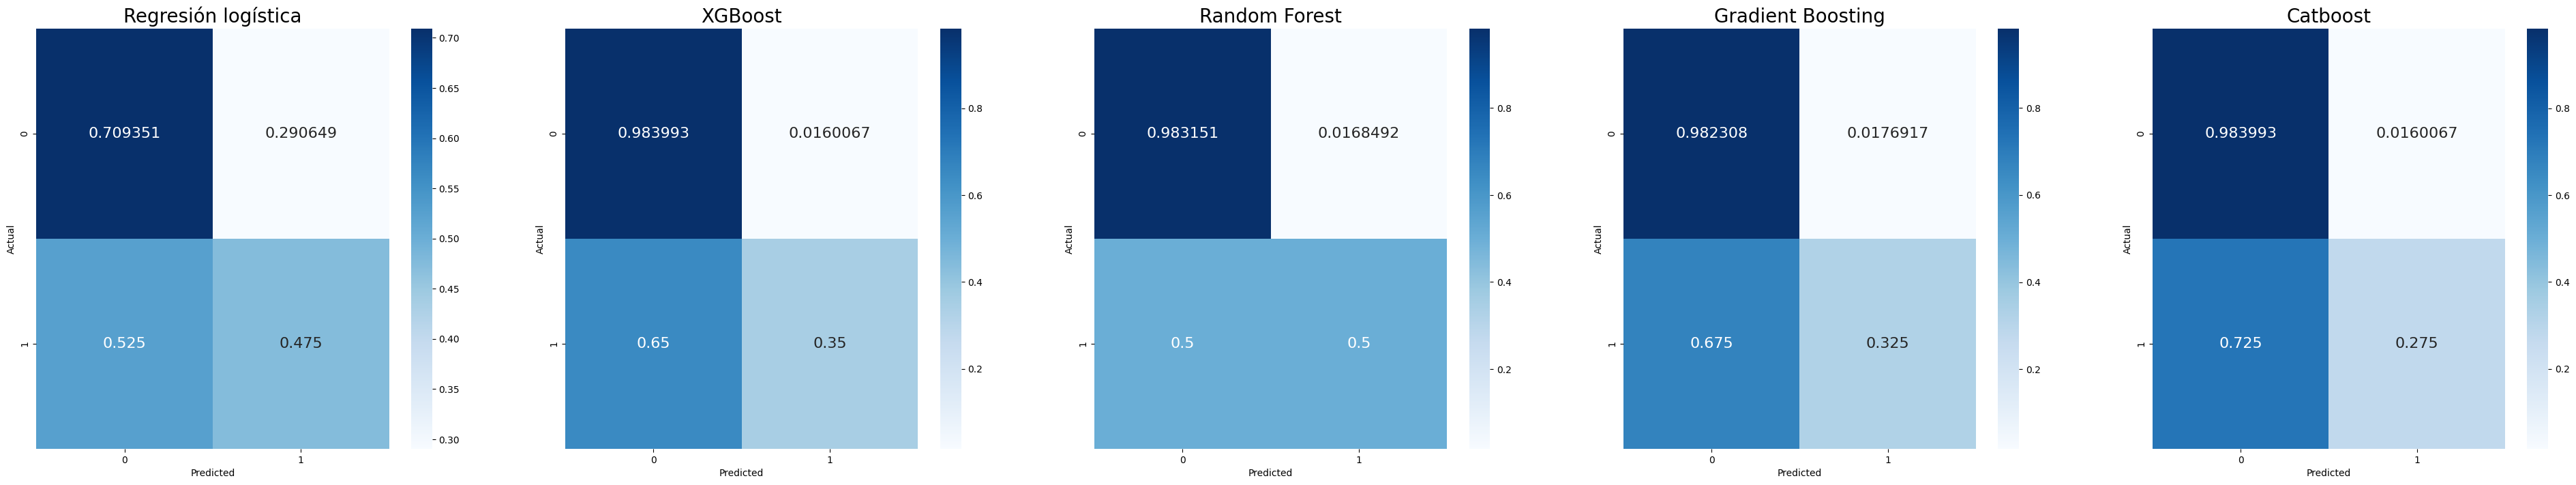

In [ ]:
confusion_matrix_reg = confusion_matrix(y_val_sm, pred_reg_sm, normalize='true')
confusion_matrix_xgb = confusion_matrix(y_val_sm, smote_prediction_xgb, normalize='true')
confusion_matrix_rfc = confusion_matrix(y_val_sm, smote_prediction_rfc, normalize='true')
confusion_matrix_gbc = confusion_matrix(y_val_sm, smote_prediction_gbc, normalize='true')
confusion_matrix_cbt = confusion_matrix(y_val_sm, smote_prediction_cbt, normalize='true')

heat_cm0 = pd.DataFrame(confusion_matrix_reg, columns=np.unique(y_val_sm), index = np.unique(y_val_sm))
heat_cm0.index.name = 'Actual'
heat_cm0.columns.name = 'Predicted'

heat_cm1 = pd.DataFrame(confusion_matrix_xgb, columns=np.unique(y_val_sm), index = np.unique(y_val_sm))
heat_cm1.index.name = 'Actual'
heat_cm1.columns.name = 'Predicted'

heat_cm2 = pd.DataFrame(confusion_matrix_rfc, columns=np.unique(y_val_sm), index = np.unique(y_val_sm))
heat_cm2.index.name = 'Actual'
heat_cm2.columns.name = 'Predicted'

heat_cm3 = pd.DataFrame(confusion_matrix_gbc, columns=np.unique(y_val_sm), index = np.unique(y_val_sm))
heat_cm3.index.name = 'Actual'
heat_cm3.columns.name = 'Predicted'

heat_cm4 = pd.DataFrame(confusion_matrix_cbt, columns=np.unique(y_val_sm), index = np.unique(y_val_sm))
heat_cm4.index.name = 'Actual'
heat_cm4.columns.name = 'Predicted'

f, ax = plt.subplots(1, 5, figsize=(20,8))
f.subplots_adjust(left=None, bottom=None, right= 2, top=None, wspace=None, hspace= None)

sns.heatmap(heat_cm0, cmap="Blues", annot=True, annot_kws={"size": 16},fmt='g', ax = ax[0])
ax[0].set_title('Regresión logística', fontsize = 20)
sns.heatmap(heat_cm1, cmap="Blues", annot=True, annot_kws={"size": 16},fmt='g', ax = ax[1])
ax[1].set_title('XGBoost', fontsize = 20)
sns.heatmap(heat_cm2, cmap="Blues", annot=True, annot_kws={"size": 16},fmt='g', ax = ax[2])
ax[2].set_title('Random Forest', fontsize = 20)
sns.heatmap(heat_cm3, cmap="Blues", annot=True, annot_kws={"size": 16},fmt='g', ax = ax[3])
ax[3].set_title('Gradient Boosting', fontsize = 20)
sns.heatmap(heat_cm4, cmap="Blues", annot=True, annot_kws={"size": 16},fmt='g', ax = ax[4])
ax[4].set_title('Catboost', fontsize = 20)

plt.show()

# **Testing de mejores modelos con conjunto de test**

In [ ]:
test_pred_rfc = best_est_rfc.predict(X_test)
test_pred_gbc = best_est_gbc.predict(X_test)

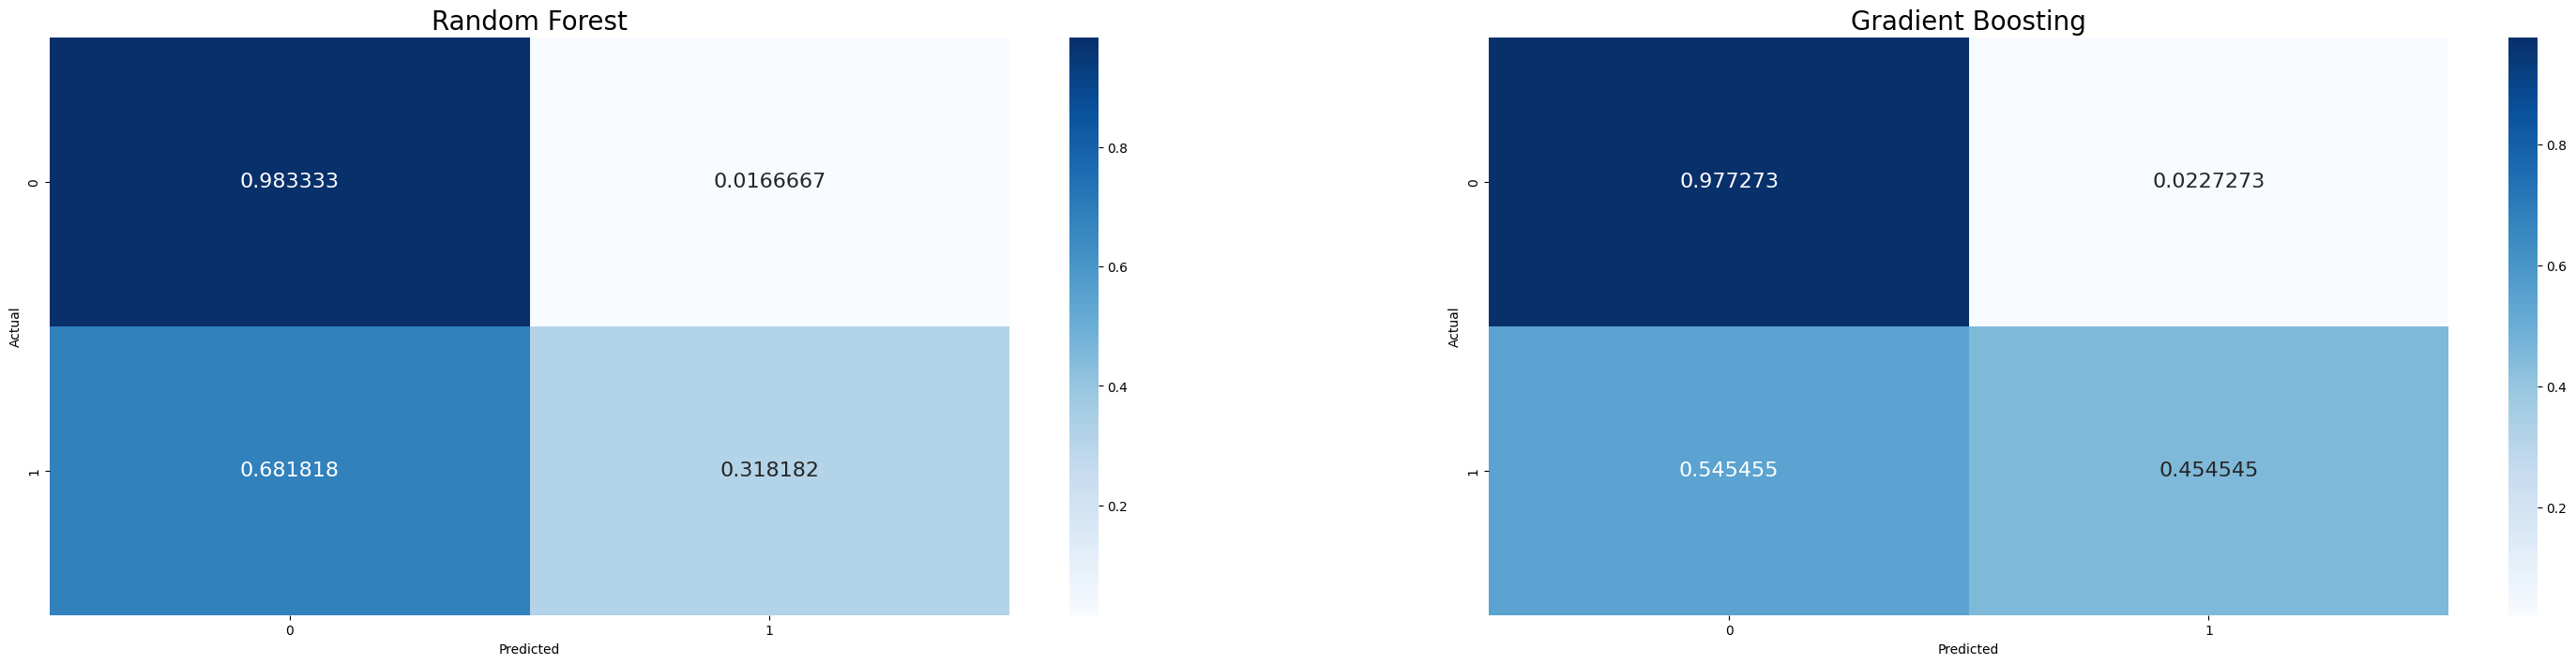

In [ ]:
confusion_matrix_rfc = confusion_matrix(y_test, test_pred_rfc, normalize='true')
confusion_matrix_gbc = confusion_matrix(y_test, test_pred_gbc, normalize='true')

heat_cm0 = pd.DataFrame(confusion_matrix_rfc, columns=np.unique(y_test), index = np.unique(y_test))
heat_cm0.index.name = 'Actual'
heat_cm0.columns.name = 'Predicted'

heat_cm1 = pd.DataFrame(confusion_matrix_gbc, columns=np.unique(y_test), index = np.unique(y_test))
heat_cm1.index.name = 'Actual'
heat_cm1.columns.name = 'Predicted'

f, ax = plt.subplots(1, 2, figsize=(15,8))
f.subplots_adjust(left=None, bottom=None, right= 2, top=None, wspace=None, hspace= None)

sns.heatmap(heat_cm0, cmap="Blues", annot=True, annot_kws={"size": 16},fmt='g', ax = ax[0])
ax[0].set_title('Random Forest', fontsize = 20)
sns.heatmap(heat_cm1, cmap="Blues", annot=True, annot_kws={"size": 16},fmt='g', ax = ax[1])
ax[1].set_title('Gradient Boosting', fontsize = 20)

plt.show()

In [ ]:
print(classification_report(y_test, test_pred_rfc, target_names=label))

              precision    recall  f1-score   support

  Fin.Stable       0.98      0.98      0.98       660
Fin.Unstable       0.39      0.32      0.35        22

    accuracy                           0.96       682
   macro avg       0.68      0.65      0.67       682
weighted avg       0.96      0.96      0.96       682



In [ ]:
print(classification_report(y_test, test_pred_gbc, target_names=label))

              precision    recall  f1-score   support

  Fin.Stable       0.98      0.98      0.98       660
Fin.Unstable       0.40      0.45      0.43        22

    accuracy                           0.96       682
   macro avg       0.69      0.72      0.70       682
weighted avg       0.96      0.96      0.96       682

